In [18]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sharpe(tickers, start_date, end_date, trading_days):
    # Download stock data from Yahoo Finance
    stock_data = {}
    for company, ticker in tickers.items():
        try:
            stock_data[company] = yf.download(ticker, start=start_date, end=end_date)
            stock_data[company].reset_index(inplace=True)  # Reset index
        except Exception as e:
            print(f"Error downloading data for {company}: {e}")
            continue

    # Calculate daily returns
    daily_returns = {}
    for company, data in stock_data.items():
        if not data.empty:
            data['Daily Return'] = data['Close'].pct_change()
            daily_returns[company] = data['Daily Return']

    # Calculate annualized mean daily return, volatility, and Sharpe ratio
    metrics = []

    for company, returns in daily_returns.items():
        if not returns.empty:
            mean_return = returns.mean() * trading_days
            volatility = returns.std() * np.sqrt(trading_days)
            sharpe_ratio = mean_return / volatility
            metrics.append((company, mean_return, volatility, sharpe_ratio))

    # Convert metrics to DataFrame
    metrics_df = pd.DataFrame(metrics, columns=['Company', 'Mean Return', 'Volatility', 'Sharpe Ratio'])

    # Create a scatter plot
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(metrics_df['Volatility'], metrics_df['Mean Return'], c=metrics_df['Sharpe Ratio'], cmap='viridis', s=100, alpha=1, edgecolors='w')

    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Ratio de Sharpe', fontsize=14, fontweight='bold')

    # Customize the title and labels
    plt.title(f'Rendimiento Promedio vs. Volatilidad (Color: Ratio de Sharpe) {start_date}-{end_date}', fontsize=18, fontweight='bold', color='black')
    plt.xlabel('Volatilidad', fontsize=14, fontweight='bold')
    plt.ylabel('Rendimiento', fontsize=14, fontweight='bold')

    # Add labels for each point
    for i, row in metrics_df.iterrows():
        plt.text(row['Volatility'], row['Mean Return'], row['Company'], fontsize=9, ha='right', fontweight='bold')

    # Show the plot
    plt.grid(True, linestyle='--', linewidth=0.7, axis='both')
    plt.tight_layout()

    # Save the plot as a PDF
    plt.savefig('sharpe_ratio_plot.pdf', format='pdf')

    # Optionally, you can also save it as SVG
    # plt.savefig('sharpe_ratio_plot.svg', format='svg')

    plt.show()

    return metrics_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


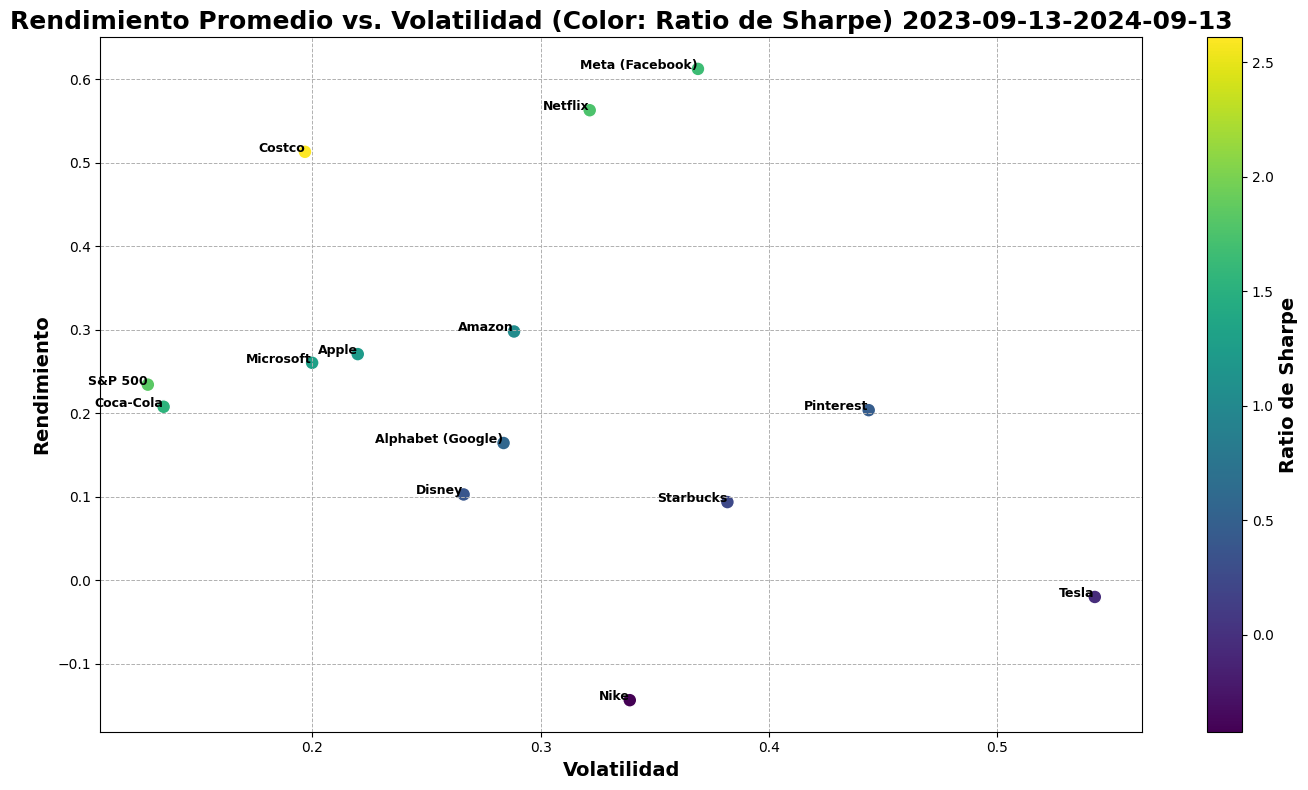

In [19]:
tickers = {
    'S&P 500': '^GSPC',
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Alphabet (Google)': 'GOOGL',
    'Amazon': 'AMZN',
    'Meta (Facebook)': 'META',
    'Starbucks': 'SBUX',
    'Netflix': 'NFLX',
    'Nike': 'NKE',
    'Pinterest': 'PINS',
    'Tesla': 'TSLA',
    'Disney': 'DIS',
    'Coca-Cola': 'KO',
    'Costco': 'COST'
}

start_date = "2023-09-13"
end_date = "2024-09-13"
training_days = 252

metrics_df = sharpe(tickers, start_date, end_date, training_days)

In [20]:
## Sharpe Ratio ordenado de mayor a menor
metrics_df.sort_values(by='Sharpe Ratio', ascending=False, inplace=True)

## Print the sorted DataFrame
print(metrics_df)

              Company  Mean Return  Volatility  Sharpe Ratio
13             Costco     0.513309    0.196772      2.608647
0             S&P 500     0.234353    0.127917      1.832063
7             Netflix     0.563151    0.321529      1.751477
5     Meta (Facebook)     0.612650    0.368955      1.660503
12          Coca-Cola     0.207853    0.134831      1.541582
2           Microsoft     0.260527    0.199900      1.303287
1               Apple     0.270935    0.219898      1.232094
4              Amazon     0.298032    0.288371      1.033501
3   Alphabet (Google)     0.164412    0.283783      0.579358
9           Pinterest     0.203788    0.443772      0.459217
11             Disney     0.102795    0.266281      0.386042
6           Starbucks     0.093638    0.381862      0.245216
10              Tesla    -0.020047    0.542842     -0.036930
8                Nike    -0.143690    0.339085     -0.423760


In [8]:
import pandas as pd

## Export the DataFrame to an Excel file
metrics_df.to_excel('metrics_sharpe_ratios.xlsx', index=False)